 Q2) Customer segmentation (also known as market basket analysis) using unsupervised ML technique. Partitions of customers in such a way show that members of a cluster share some similar characteristics.  First, use the elbow method to find the optimal number of clusters and then use K-means clustering.

In [1]:
import pandas as pd
import numpy as np

In [2]:
obj1 = pd.read_csv("Mall_Customers.csv")
obj1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
obj1.shape

(200, 5)

In [4]:
from sklearn import preprocessing
lb=preprocessing.LabelBinarizer()

In [5]:
obj1.Gender=lb.fit_transform(obj1.Gender)

In [6]:
#male = 1 and female = 0
obj1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [7]:
X = obj1.values

In [8]:
len(X)

200

# Using Elbow method to find optimal k value for clustering

In [9]:
from sklearn.cluster import KMeans
sse=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(obj1)
    sse.append(km.inertia_)

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [10]:
sse

[975512.06,
 387065.7137713771,
 271384.50878286804,
 195401.19855991466,
 157157.75790598287,
 122637.55796110154,
 103243.950679936,
 86146.21762410295,
 77113.95111283644]

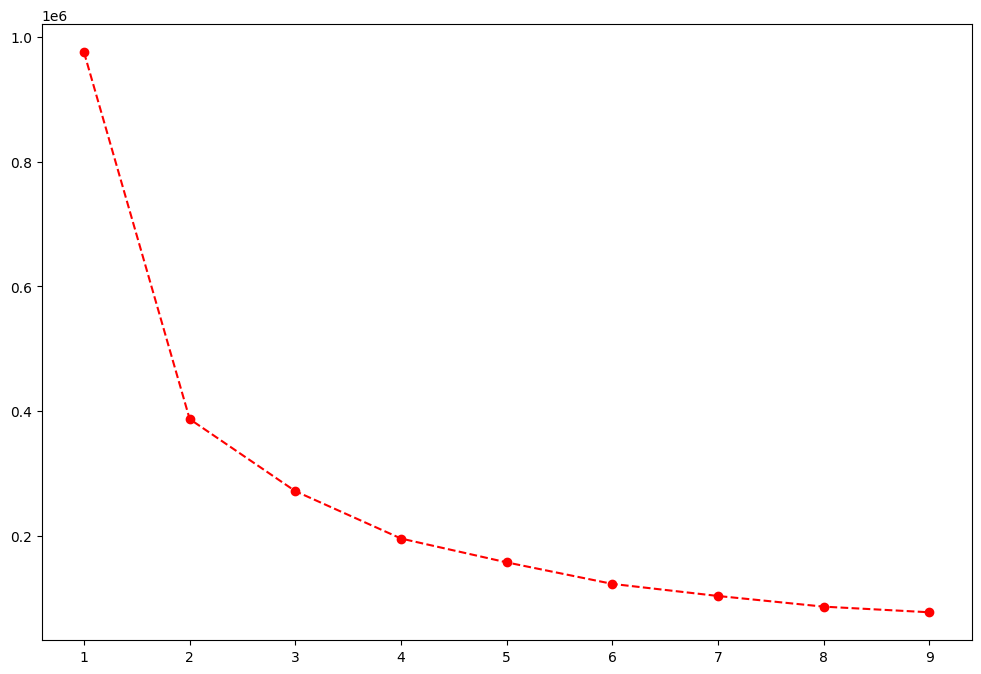

In [11]:
# plot 
import matplotlib.pyplot as plt
%matplotlib inline
figure=plt.figure(figsize=(12,8))
#plt.plot(K,sse,'k--')
plt.plot(K,sse,'--ro')

# Using Silhouette method to find optimal k value for clustering

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-10
K = range(2, 6)
for n in K:
    algorithm = (KMeans(n_clusters = n,random_state=1 ) )
    algorithm.fit(X)
    labels = algorithm.predict(X)
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('fivethirtyeight')

from sklearn.metrics import silhouette_score,davies_bouldin_score


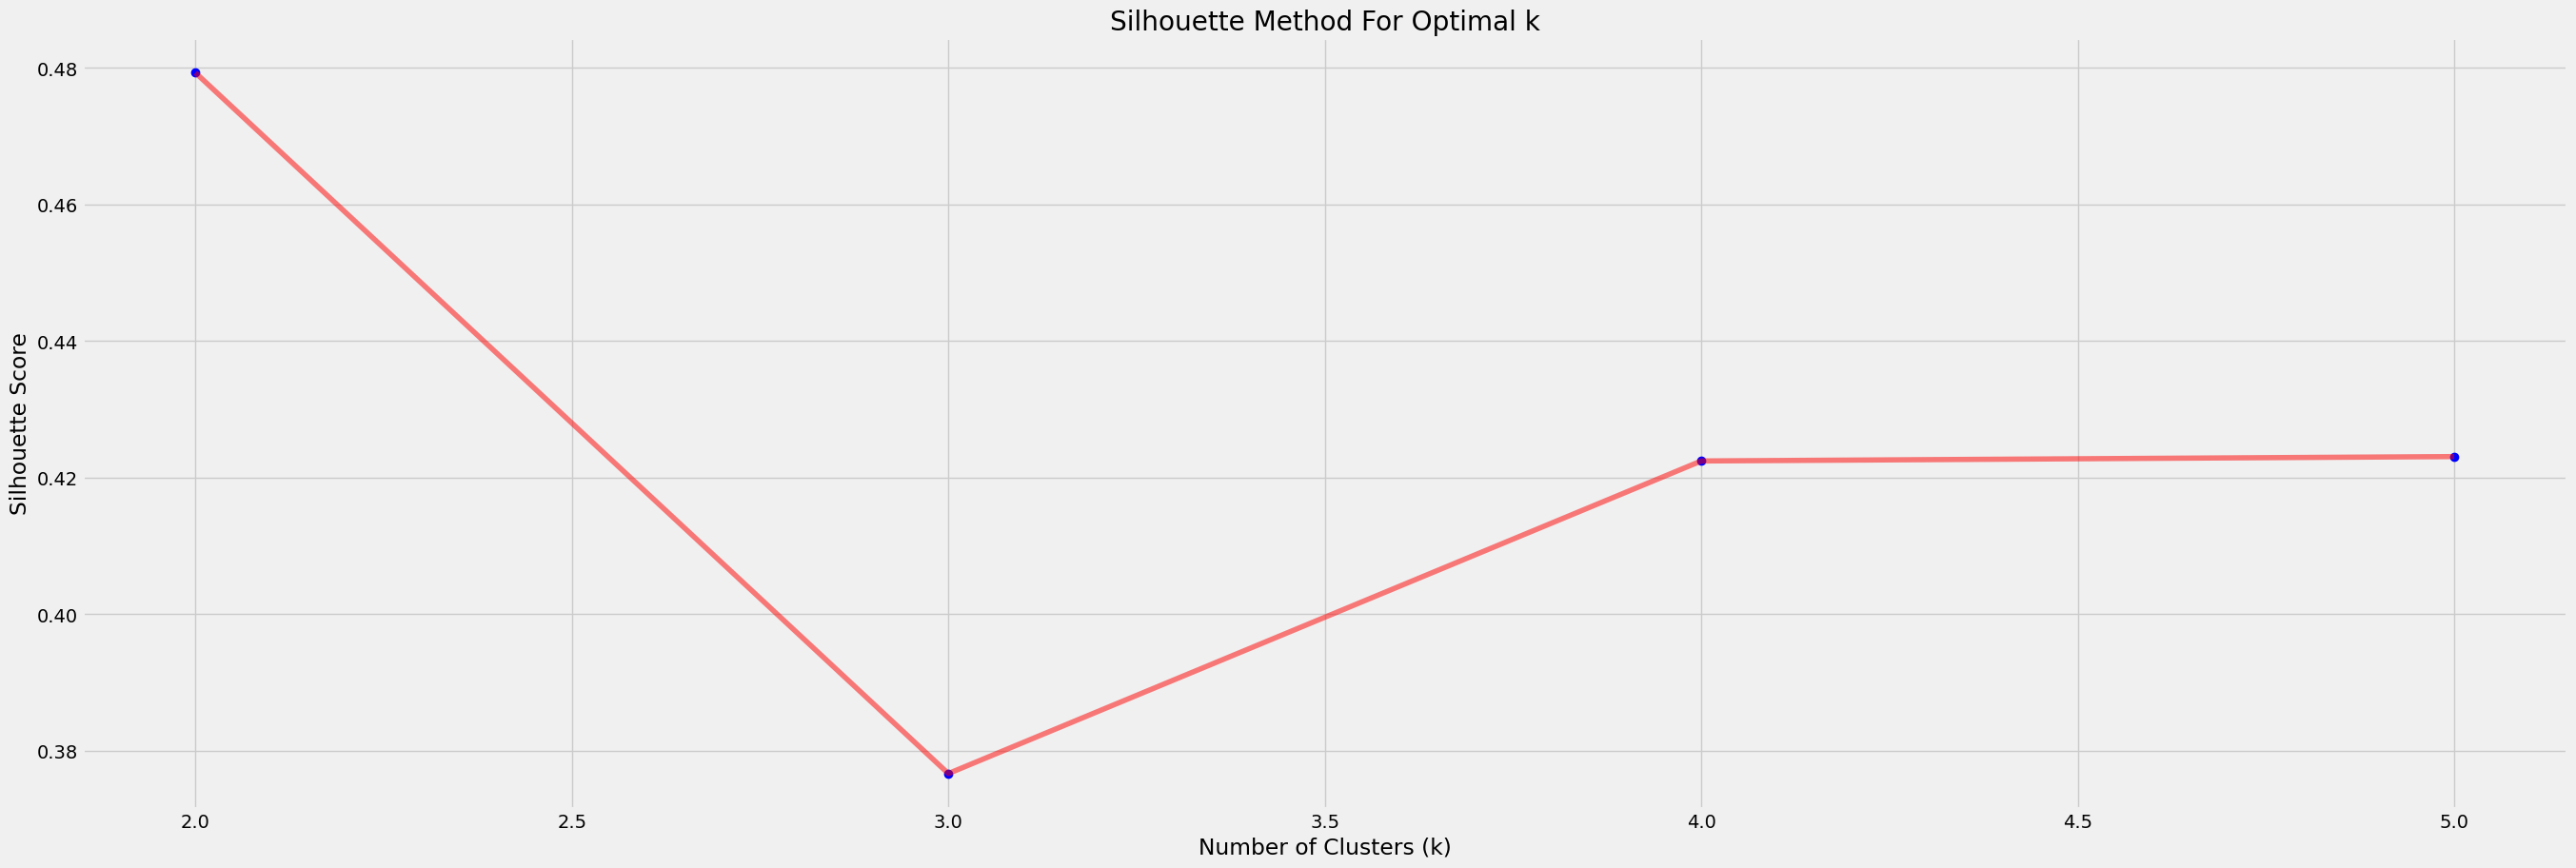

In [14]:
fig, (ax1) = plt.subplots(ncols =1)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)



ax1.plot(K,sil, 'bo')
ax1.plot(K, sil, 'r-', alpha = 0.5)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Method For Optimal k')
ax1.grid(True)


# Using K-means Clustering

In [15]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1)

In [16]:
km_labels = km.predict(X)

In [17]:
prediction=km_labels.tolist()

In [18]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
len(prediction)

200

In [20]:
l0=[]
l1=[]
for j in range(200):
    if prediction[j]==0:
        l0.append(j)
    if prediction[j]==1:
        l1.append(j)

In [21]:
#Printing indexes for cluster 0
print(l0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


In [22]:
#Printing indexes for cluster 1
print(l1)

[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


# Using fuzzy-c-means clustering

In [23]:
from fcmeans import FCM

In [24]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [25]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

In [26]:
pred=fcm_labels.tolist()

In [27]:
len(pred)

200

In [28]:
a0=[]
a1=[]
a2=[]
for j in range(200):
    if pred[j]==0:
        a0.append(j)
    if pred[j]==1:
        a1.append(j)
    if pred[j]==2:
        a1.append(j)

In [29]:
print(a0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [30]:
print(a1)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
